# 1  Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 2  Baca Dataset

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

file_path = "/content/drive/MyDrive/Colab Notebooks/phones_data_cleaned.csv"# ganti sesuai path di Colab
df = pd.read_csv(file_path)

Mounted at /content/drive


# 3 Cek Struktur Data

In [3]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand_name      1068 non-null   object 
 1   model_name      1068 non-null   object 
 2   os              1068 non-null   object 
 3   popularity      1068 non-null   int64  
 4   best_price      1068 non-null   float64
 5   lowest_price    1068 non-null   float64
 6   highest_price   1068 non-null   float64
 7   sellers_amount  1068 non-null   int64  
 8   screen_size     1068 non-null   float64
 9   memory_size     1068 non-null   float64
 10  battery_size    1068 non-null   float64
 11  release_date    1068 non-null   object 
 12  age_years       1068 non-null   int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 108.6+ KB
None
  brand_name                                    model_name       os  \
0    Alcatel          1 1/8GB Bluish Black (5033D-2JALUAA)  Android   
1    Al

# 4  Atur Tema Visualisasi

In [4]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')


# 5 Distribusi Harga Ponsel

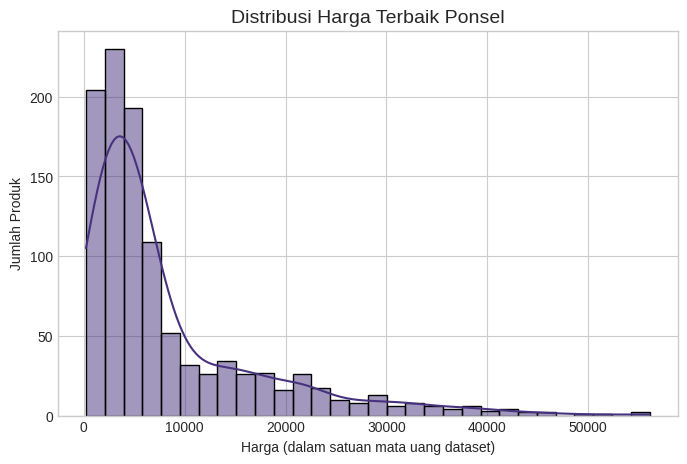

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df["best_price"], bins=30, kde=True)
plt.title("Distribusi Harga Terbaik Ponsel", fontsize=14)
plt.xlabel("Harga (dalam satuan mata uang dataset)")
plt.ylabel("Jumlah Produk")
plt.show()


# 6. 10 Merek Ponsel Terbanyak

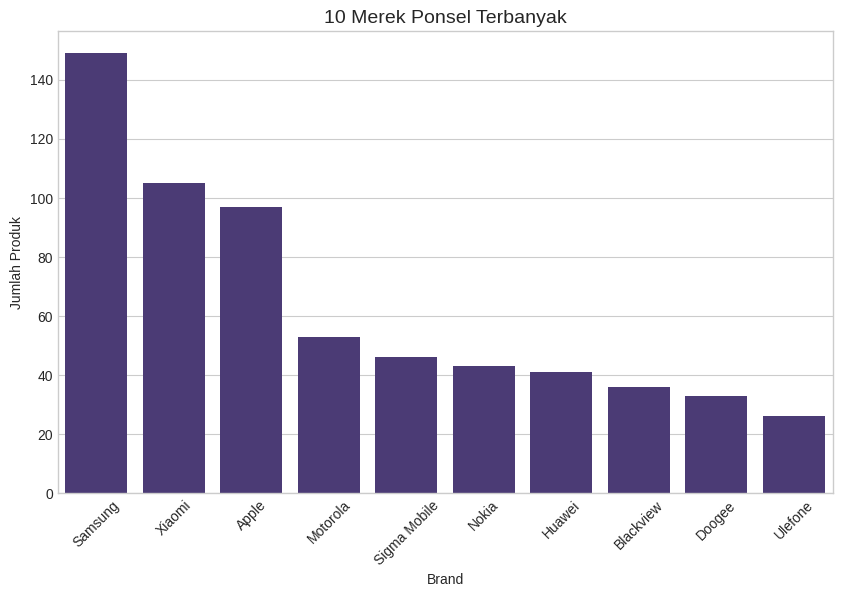

In [6]:
brand_counts = df["brand_name"].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title("10 Merek Ponsel Terbanyak", fontsize=14)
plt.xlabel("Brand")
plt.ylabel("Jumlah Produk")
plt.xticks(rotation=45)
plt.show()


# 7 Rata-rata Harga per Brand

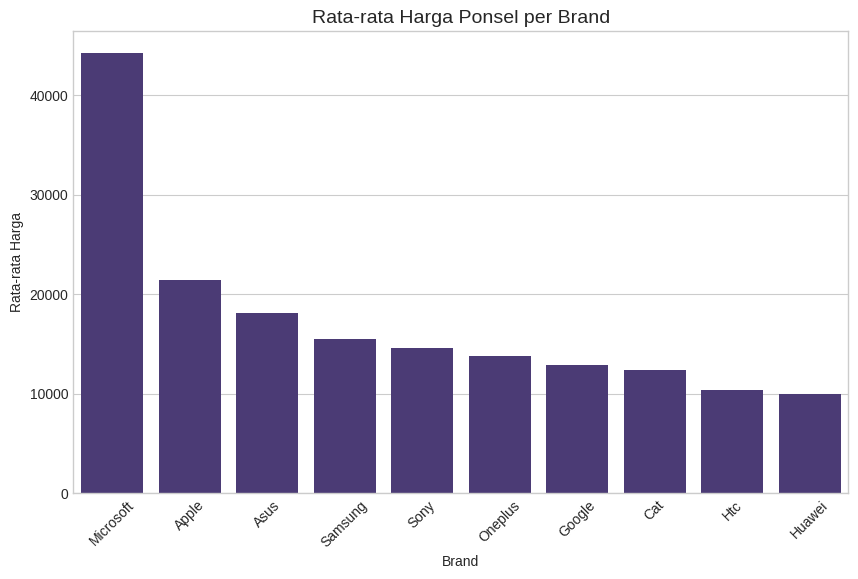

In [7]:
avg_price = df.groupby("brand_name")["best_price"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.title("Rata-rata Harga Ponsel per Brand", fontsize=14)
plt.xlabel("Brand")
plt.ylabel("Rata-rata Harga")
plt.xticks(rotation=45)
plt.show()


# 8 Heatmap Korelasi Fitur Numerik

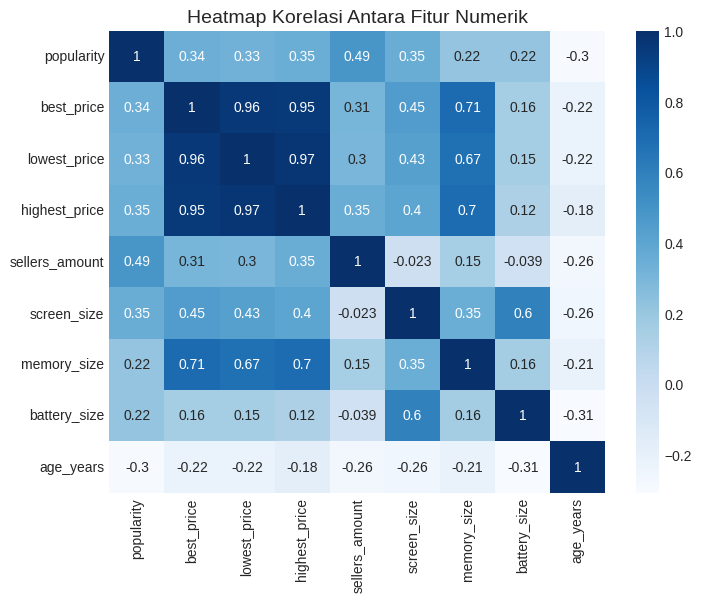

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap="Blues")
plt.title("Heatmap Korelasi Antara Fitur Numerik", fontsize=14)
plt.show()


# 9 Tren Harga berdasarkan Tahun Rilis

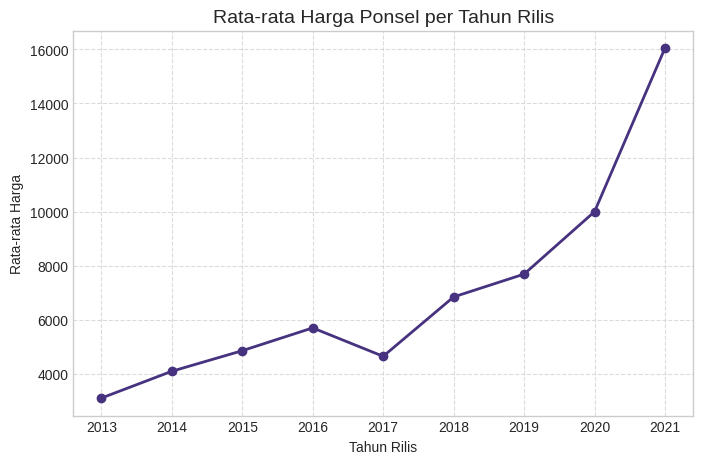

In [9]:
df["release_year"] = pd.to_datetime(df["release_date"]).dt.year
avg_year = df.groupby("release_year")["best_price"].mean()

plt.figure(figsize=(8,5))
plt.plot(avg_year.index, avg_year.values, marker='o', linestyle='-', linewidth=2)
plt.title("Rata-rata Harga Ponsel per Tahun Rilis", fontsize=14)
plt.xlabel("Tahun Rilis")
plt.ylabel("Rata-rata Harga")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [10]:
# Simpan dataset hasil cleansing
df.to_csv("MobilePhonesData_Cleaned.csv", index=False)

# Download langsung ke laptop dari Google Colab
from google.colab import files
files.download("MobilePhonesData_Cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>